In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'JK'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

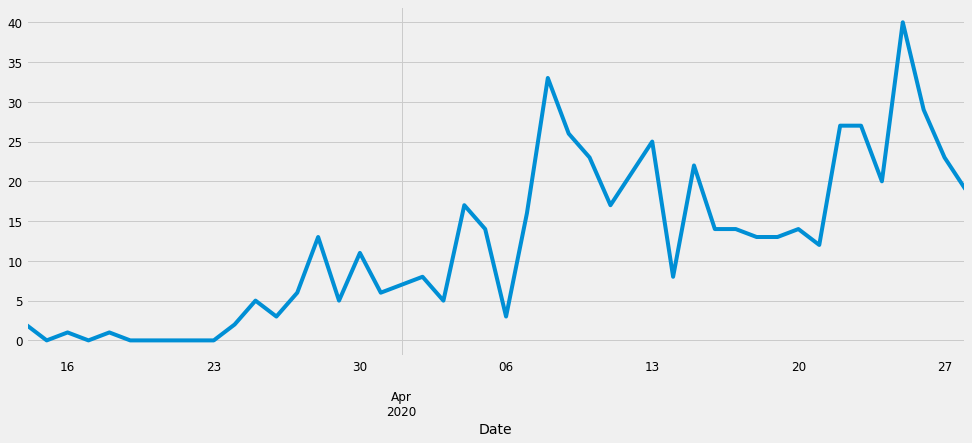

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

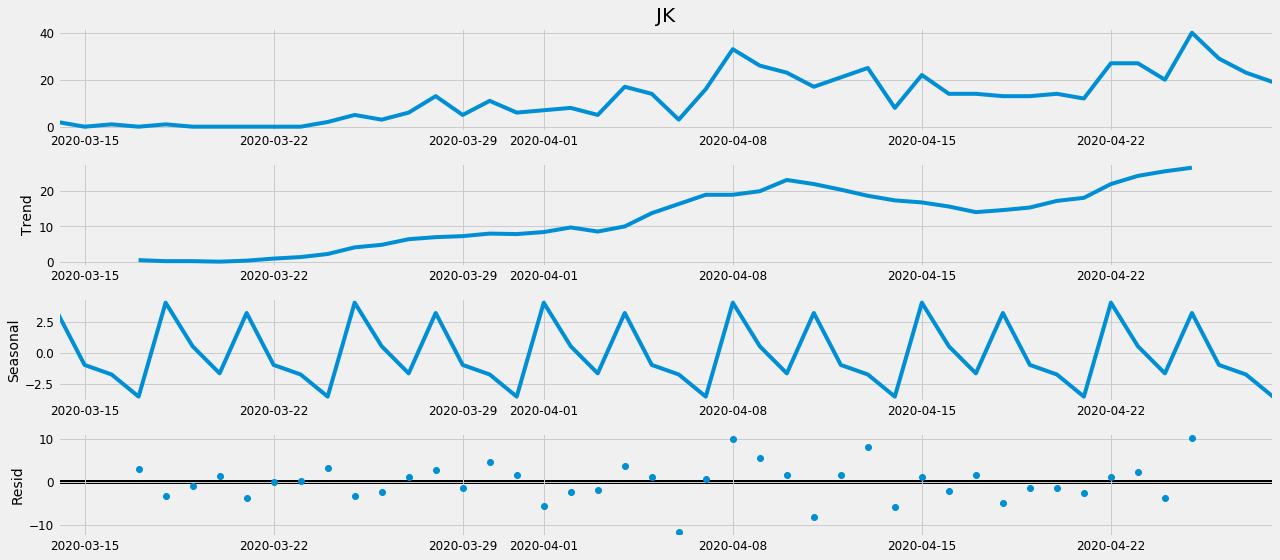

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:380.2073932583108


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1344.2028294958761
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:259.0440164017433
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:171.29895132342838
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:267.2286916994378


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1384.9098507688389
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:179.22600470488788
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:169.9399999933714
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:339.88316156977646


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1340.4871953104202
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:243.76190423201547
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:156.2518566771324
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:259.01409955475276


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1270.5901259583193
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:174.89474701144965
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:156.9905082232984
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:304.1780567640052
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1242.639466827122

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:248.41122097232318
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:152.71697754988304
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:239.83126434359596
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1320.5546284418554
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:162.00267072949282
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:154.3766356290741
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:290.0726869725205
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1246.8914901595444
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:233.41642105182106
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:142.82403608680417
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:233.6362175053617
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1278.162270594336
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:158.40323587957315
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:144.62950734457092
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:310.28022996829446


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1460.2738587579129
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:249.0224634779062
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:161.31701669250157
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:240.49886770545078


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1388.123779102444
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:161.35732695375532
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:163.20113113721763
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:297.92610918736455


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1410.1644228428945
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:241.462334465833
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:149.98230982163625
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:235.8704322600772


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1340.310957120936
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:158.85168730518248
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:150.93362446318218
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:299.9048496797366


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1414.2724612485017
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:246.6141021383526
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:151.40036840292555
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:230.9399415086206


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1446.1432466594777
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:150.56471833326373
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:152.43024263443016
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:292.01560809400587


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1219.1248834649666
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:234.10606685620988
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:143.796927660241
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:229.48346923888064


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1249.3175370319618
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:150.58713626062934
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:146.10495193427977


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3434      0.411      0.835      0.404      -0.463       1.149
ma.L1         -0.9572      0.598     -1.601      0.109      -2.129       0.215
ma.S.L12      -1.0000   1.07e+04  -9.34e-05      1.000    -2.1e+04     2.1e+04
sigma2        49.5732   5.31e+05   9.34e-05      1.000   -1.04e+06    1.04e+06


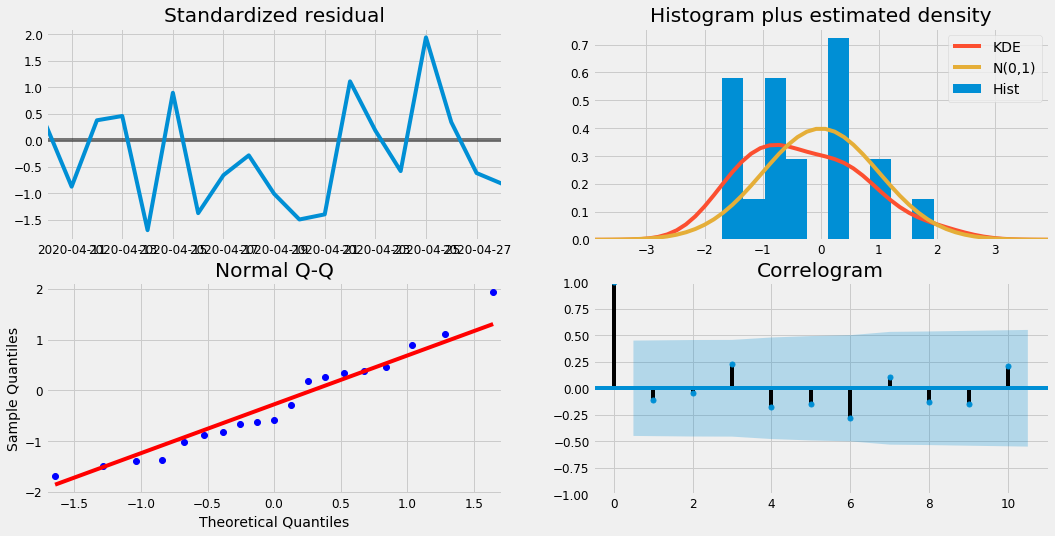

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

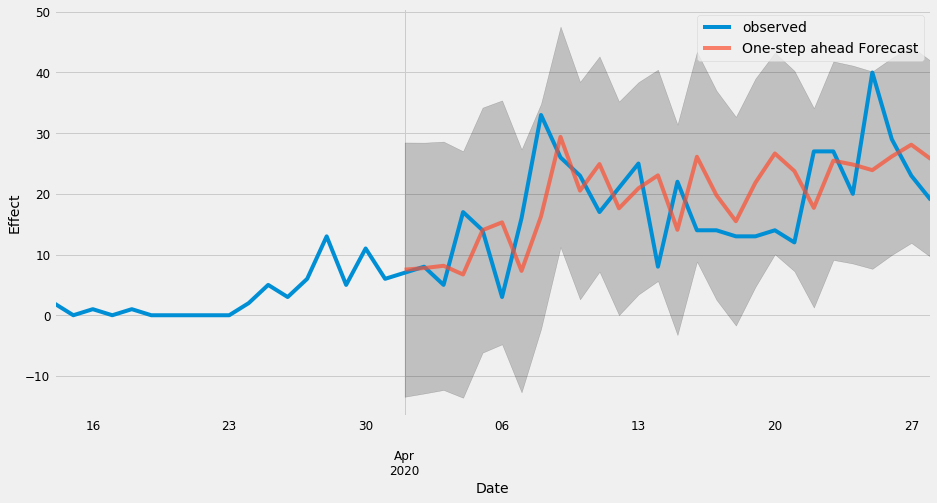

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 72.64


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 8.52


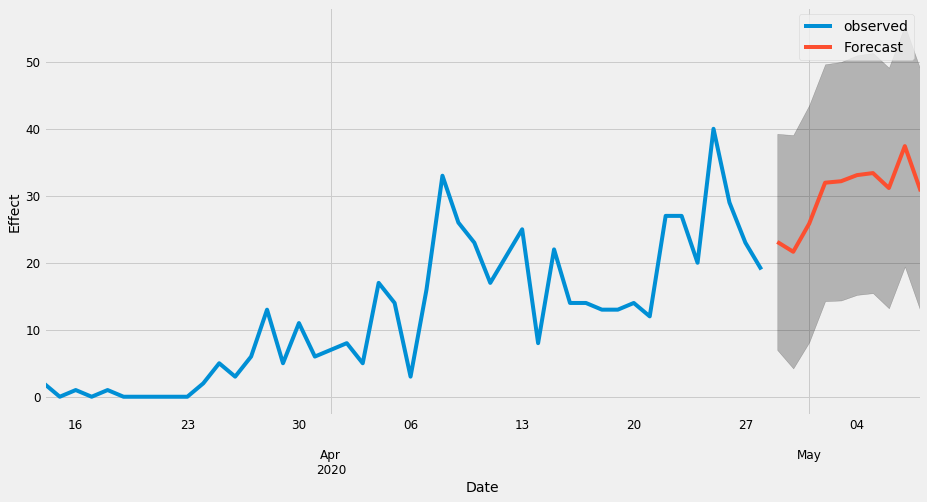

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,20,17
2020-04-25,40,3
2020-04-26,29,25
2020-04-27,23,27
2020-04-28,19,12


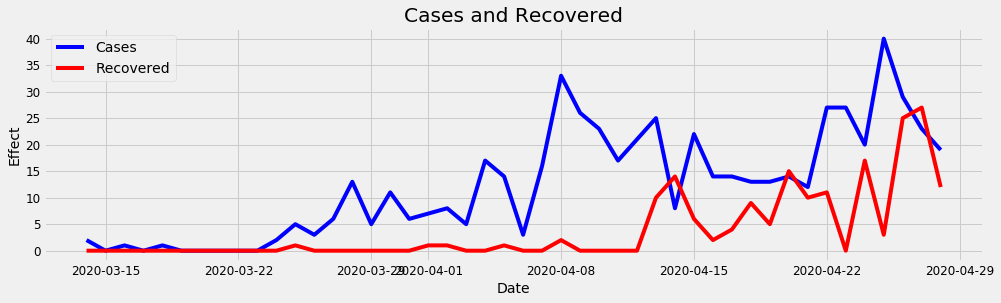

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

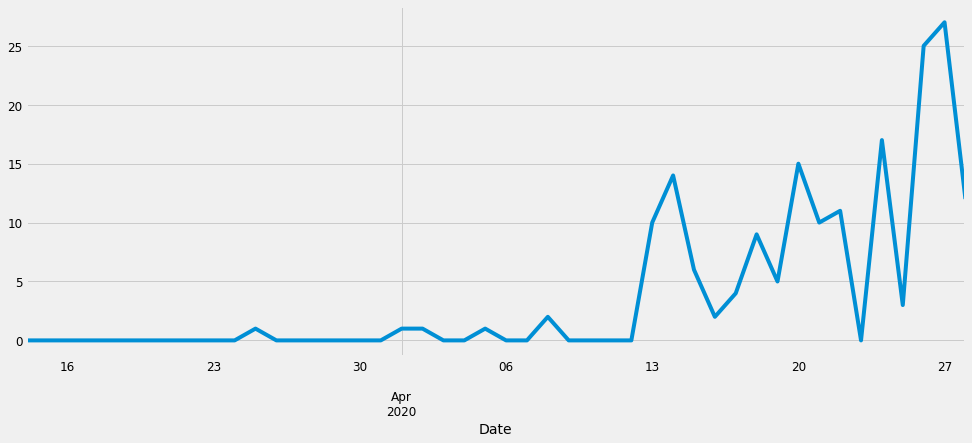

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

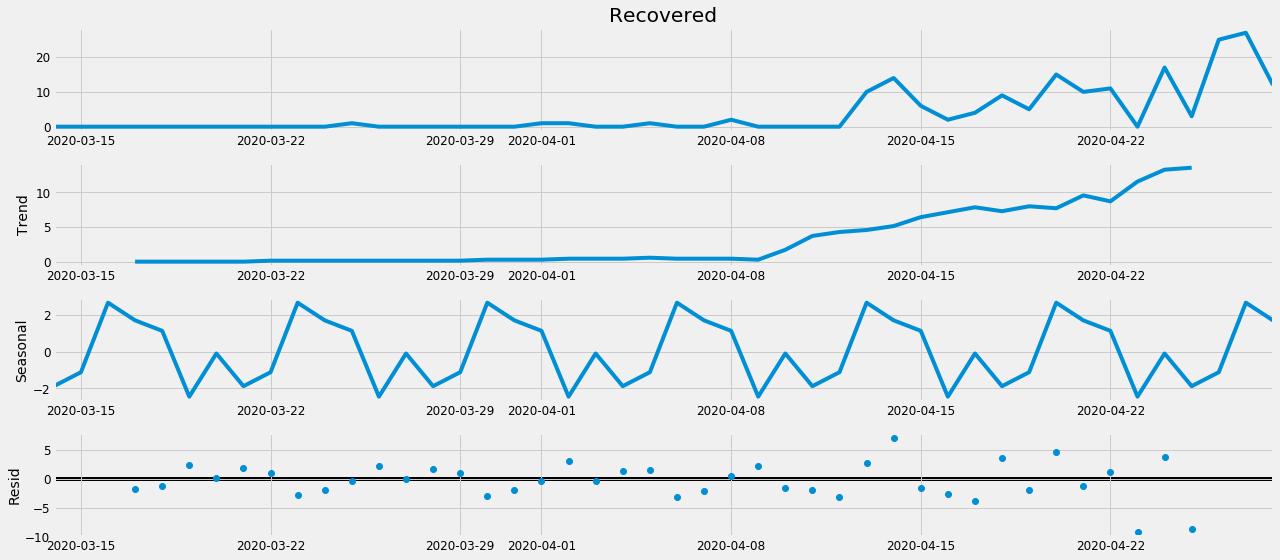

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:314.08310948342455
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1343.6482788411226


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:227.67303203021464
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:154.92846976263738
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:230.9019292255772


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1317.9039949810933
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:160.1555581580169


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:156.04845517538504
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:296.501274657956


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1217.201549666461
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:219.027449562549
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:148.90116266402515
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:230.78231873448587


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1186.2458790487067
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:160.8395959981546
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:150.5665784909635
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:287.65112235162167
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:804.8778217078382
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:222.39954357860793
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:150.0769327810064
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:227.57284585416596


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1216.4279950060923
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:155.9478867165593
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:151.63165572611484
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:266.4949975271049


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:948.4168383358233
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:199.82230861917782
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:134.87690620533994
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:212.67247258824617


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1140.4349598244992
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:146.55109967005262
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:136.8202957633265
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:288.4042442772729


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1178.062368311571
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:221.17326506479375
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:153.61598150911118
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:223.1537924008496


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1145.589874142906
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:153.61688935786069
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:155.6165685435244
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:266.42962533538173


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1342.1242246192799
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:205.03564862489873
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:140.05011824399415
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:211.08653652089689


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1310.6943381300475
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:146.72117329090236
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:142.05010834925395
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:276.34244059329274


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1075.9422671155917
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:211.59522925386443
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:144.06676995803312
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:211.8124457786264
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1274.0787738820259
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:144.09593578495617
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:146.05333908287832
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:268.376414954099


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1141.4136954629982
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:201.01236889974444
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:136.44605160067914
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:208.4952162980074


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1333.4034013950325
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:142.26788477247555
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:138.38811197636196


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1787      0.322     -0.555      0.579      -0.810       0.452
ma.L1         -0.7305      0.325     -2.250      0.024      -1.367      -0.094
ma.S.L12      -0.1502      0.437     -0.344      0.731      -1.007       0.707
sigma2        50.4858     19.186      2.631      0.009      12.882      88.090


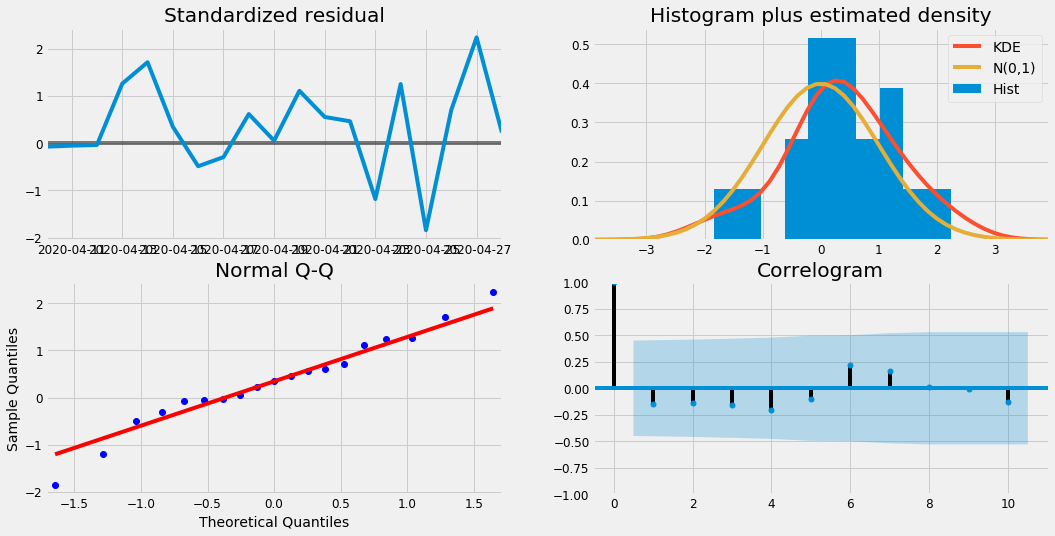

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

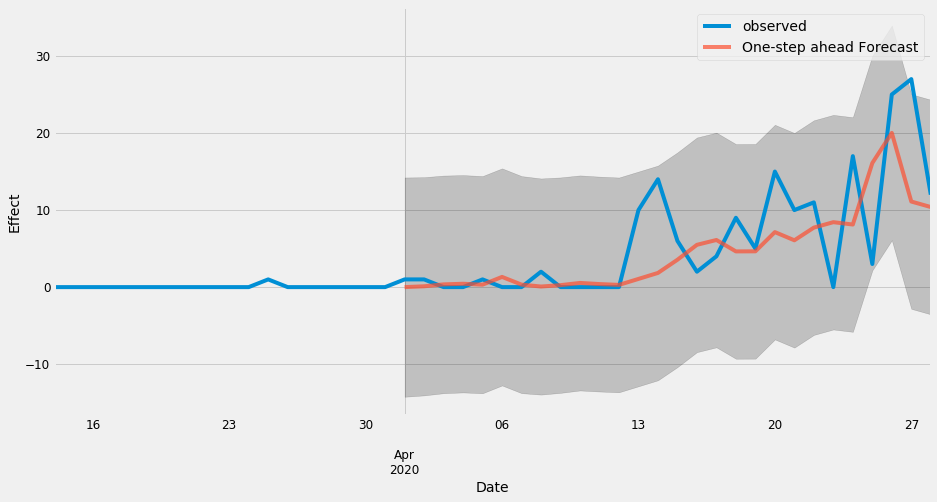

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 34.56


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 5.88


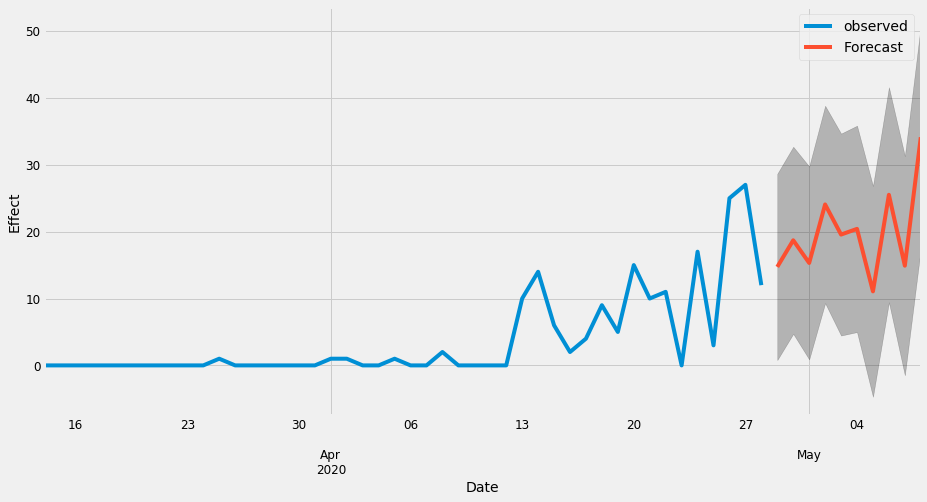

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

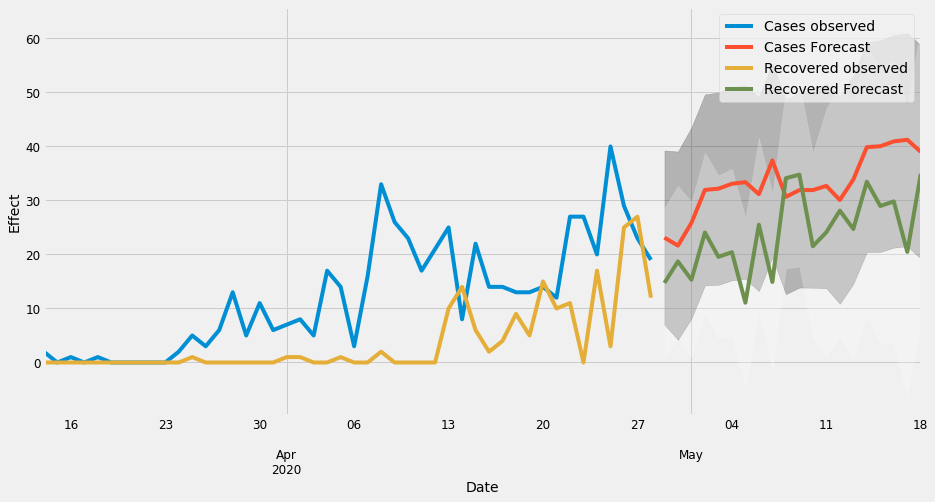

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=20)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=20)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

59

In [33]:
int(min(cases_result_date[0]))

21

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-30


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-13


In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-06-13


In [ ]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

In [ ]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

In [ ]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

In [ ]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()